In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")

In [ ]:
#Загрузка и первичный анализ данных#

In [ ]:
# Будем использовать только обучающую выборку
data = pd.read_csv('Movies.csv')

In [ ]:
data.shape

(866, 13)

In [ ]:
data.isnull().sum()

index             0
Title             0
Release Date     13
Year             12
Description     866
URL               0
Rating           19
Runtime          19
Genres            0
Votes            19
Directors         8
Series            0
Order             0
dtype: int64

In [ ]:
#data type#
list(zip(data.columns, [i for i in data.dtypes]))

[('index', dtype('int64')),
 ('Title', dtype('O')),
 ('Release Date', dtype('O')),
 ('Year', dtype('float64')),
 ('Description', dtype('float64')),
 ('URL', dtype('O')),
 ('Rating', dtype('float64')),
 ('Runtime', dtype('float64')),
 ('Genres', dtype('O')),
 ('Votes', dtype('float64')),
 ('Directors', dtype('O')),
 ('Series', dtype('O')),
 ('Order', dtype('int64'))]

In [ ]:
# Колонки с пропусками
hcols_with_na = [c for c in data.columns if data[c].isnull().sum() > 0]
hcols_with_na

['Release Date',
 'Year',
 'Description',
 'Rating',
 'Runtime',
 'Votes',
 'Directors']

In [ ]:
data.shape

(866, 13)

In [ ]:
# Количество пропусков
[(c, data[c].isnull().sum()) for c in hcols_with_na]

[('Release Date', 13),
 ('Year', 12),
 ('Description', 866),
 ('Rating', 19),
 ('Runtime', 19),
 ('Votes', 19),
 ('Directors', 8)]

In [ ]:
# Доля (процент) пропусков
[(c, data[c].isnull().mean()) for c in hcols_with_na]

[('Release Date', 0.015011547344110854),
 ('Year', 0.013856812933025405),
 ('Description', 1.0),
 ('Rating', 0.021939953810623556),
 ('Runtime', 0.021939953810623556),
 ('Votes', 0.021939953810623556),
 ('Directors', 0.009237875288683603)]

In [ ]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['Directors', 'Year', 'Votes']

In [ ]:
res = data.dropna(axis=1, how='any')

In [ ]:
# Удаление пропусков
data_drop = data[hcols_with_na_temp].dropna()
data_drop.shape

(847, 3)

In [ ]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

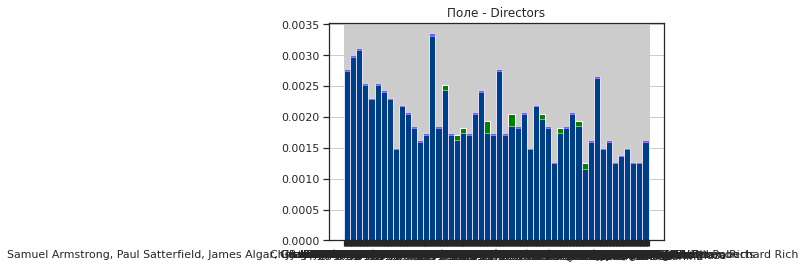

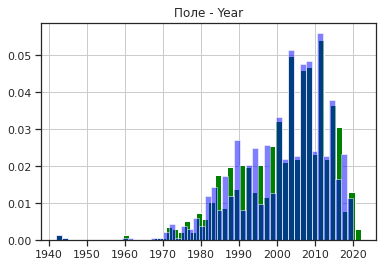

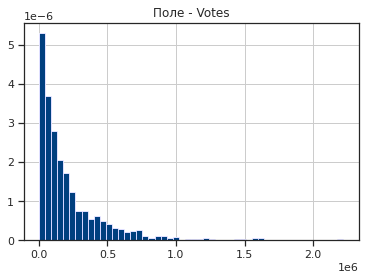

In [ ]:
plot_hist_diff(data, data_drop, hcols_with_na_temp)